In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/regression-technique-eda/House Price Regression Tecnique/sample_submission.csv
/kaggle/input/regression-technique-eda/House Price Regression Tecnique/data_description.txt
/kaggle/input/regression-technique-eda/House Price Regression Tecnique/train.csv
/kaggle/input/regression-technique-eda/House Price Regression Tecnique/Project On House Price data .ipynb
/kaggle/input/regression-technique-eda/House Price Regression Tecnique/test.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

<h1 style="background-color:#E2E2E2 ; color: #19747E; padding: 20px;">Complete Component Analysis</h1>

<p style="background-color:#E2E2E2; color: #19747E; padding: 20px; font-size: 18px;">
 🚀 Welcome this notebook of Feature Engineering! Let us  into the magic of Complete Component Analysis. This technique decides the fate of features with a flick of its analytical wand. ✨🔍
<br>
    No smoke, no mirrors – just the elegant simplicity of discarding missing data . 🌟📊✨ We will simply be removing all the NAN values preseving the distribution of data 🎨🌌
  </p>
  </p>

<p style="background-color:#E2E2E2; color: #19747E; padding: 20px; font-size: 18px;">
 <u>Use When :</u><br>
    1) Suitable for both <i>Categorical and Numerical data</i> 📊🔢<br>
    2) Preserves the original distribution of data 🔄📊<br>
    3) Variable is <i><u>missing completely at random</u></i> 🎭🌐<br>
    4) Missing data is a very small percentage of total data, around <b>5%</b> 📉🔍
    </p>
 

<p style="background-color:#E2E2E2; color: #19747E; padding: 20px; font-size: 18px;">
    <u>Not Ideal When :</u><br>
    1) A variable has a big proportion of NA ❌📊<br>
    2) Different variables have different attributes with NaN ❌🔄📈<br>
    3) Don't use CCA when a large number of values are missing, especially not missing completely at random ❌📉🔍 </p>

In [3]:
df = pd.read_csv('/kaggle/input/regression-technique-eda/House Price Regression Tecnique/train.csv')


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
columns_with_null = df.columns[df.isnull().any()]

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<p style="background-color:#E2E2E2; color: #19747E; padding: 20px; font-size: 18px;">
    <u>🕵️‍♂️Let's delve into the details of what is being done !</u><br><br>
📊 Firstly, all variables with NaN values are gathered and stored in a variable named 'var_with_na'. 💡<br><br>
    📉 The next step involves creating a comprehensive variable named 'data_na'which maps out columns with null values and their respective counts. 🗺️ This provides a detailed overview of the extent of missing data.<br><br>
 💻 Transforming 'data_na' into a DataFrame offers a tabular  representation displaying the  attributes with NaN values and their corresponding percentages.<br><br>
🔍 Armed with this information, we gain insights into the distribution of missing values, empowering us to make informed decisions on how to handle them in our dataset. 🚀
</p>

In [9]:
for column in columns_with_null :
    null_count = df[column].isnull().sum()
    print(f"{column} : {null_count}")

LotFrontage : 259
Alley : 1369
MasVnrType : 872
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406


In [10]:
var_with_na = [var for var in df.columns if df[var].isnull().mean()>0]

<p style="background-color:#E2E2E2; color: #19747E; padding: 20px; font-size: 18px;">
    📋 'var_with_na' is a curated list of attributes suitable for Complete Component Analysis (CCA) as these attributes contain a nan component of less than 5%. 🧐📉
</p>


In [11]:
var_with_na 

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [12]:
data_na = df[var_with_na].isnull().mean()
data_na

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [13]:
data_na = pd.DataFrame(data_na.reset_index())
data_na.columns = ['variable' , 'na_percentage']
data_na.sort_values(by = 'na_percentage', ascending = False , inplace = True)
data_na

,variable,na_percentage
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
2,MasVnrType,0.597260
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479


In [14]:
var_cca = [var for var in df.columns if df[var].isnull().mean()<0.05]

In [15]:
var_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'SaleP

<p style="background-color:#E2E2E2; color: #19747E; padding: 20px; font-size: 18px;">
    📊 The following code illustrates the percentage of values preserved when we drop the NaNs from 'var_cca'. 📈✨
<br><br>
    🔄 Next, I've provided a visual comparison between the shape of the original data and the data after Complete Component Analysis (CCA). This comparison implies that the data loss is bearable. 📊🔄

</p>


    

In [16]:
#calculating the part of data without any nan values
len(df[var_cca].dropna())/len(df)

0.9671232876712329

In [17]:
data_cca = df[var_cca].dropna()
df.shape , data_cca.shape

((1460, 81), (1412, 69))

<Axes: >

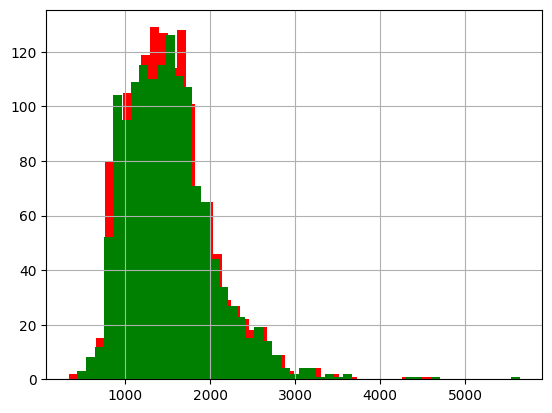

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

#plotting the orignal data
df['GrLivArea'].hist(bins = 50 , ax = ax , color = 'red')

#dataframe after performing CCA
#making overlapping graph for comparing with orignal distribution 

data_cca['GrLivArea'].hist(bins = 50 , ax = ax , color = 'green')


<Axes: >

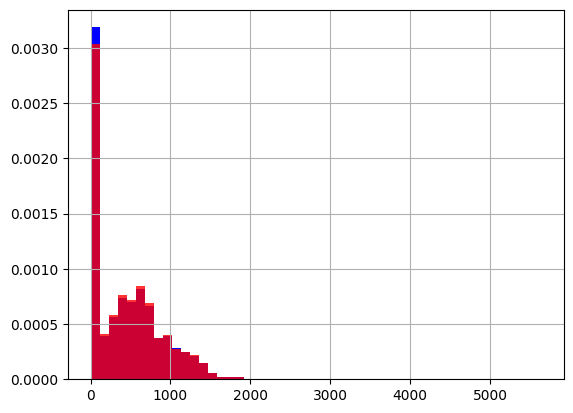

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

#orignal data
df['BsmtFinSF1'].hist(bins=50,ax=ax,density = True, color = 'blue')

#data after cca

data_cca['BsmtFinSF1'].hist(bins = 50 , ax = ax , density = True , alpha = 0.8 , color = 'red')

In [20]:
def for_categoricals(df,df_cca,variable): 
    temp = pd.concat(
            [
              df[variable].value_counts()/len(df),
              df_cca[variable].value_counts()/len(df_cca)],
        axis = 1
    )
    temp.columns = ['Actual' , 'After_CCA']
    return temp

In [21]:
for_categoricals(df,data_cca ,'BsmtQual' )

,Actual,After_CCA
BsmtQual,,
TA,0.444521,0.458924
Gd,0.423288,0.431303
Ex,0.082877,0.084986
Fa,0.023973,0.024788


In [22]:
t = for_categoricals(df,data_cca , 'ScreenPorch')
t.head()

,Actual,After_CCA
ScreenPorch,,
0,0.920548,0.917847
192,0.004110,0.004249
120,0.003425,0.003541
224,0.003425,0.003541
189,0.002740,0.002833


<p style="background-color:#E2E2E2; color: #19747E; padding: 20px; font-size: 18px;"> <b><u>CONCLUSION</u></b><br>
    1) ✅ If the number of missing values is minimal, using Complete Component Analysis (CCA) is a good option. 📉🔍
<br><br>
    2) 🎯 If the missing values are specific to a particular attribute, it's a smarter choice to apply CCA. 🧠🔍
<br><br>
    3) 📊 As evidenced by the graph and frequency comparison for categorical data, CCA does not manipulate the data distribution. 📈🔄
</p>

